In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testimages/athlete.png
/kaggle/input/testimages/testGenerated.png
/kaggle/input/testimages/pantelleria_boy.png


#LLAVA + JSON

In [2]:
!pip install --upgrade transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import requests #serve per prendere le immagini online
from PIL import Image # gestione immagini
import torch
from transformers import BitsAndBytesConfig
from transformers import pipeline
from transformers import LlavaProcessor, LlavaForConditionalGeneration
import json

2025-07-09 09:01:12.531676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752051672.714552      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752051672.775043      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model_id = "llava-hf/llava-1.5-7b-hf"

processor = LlavaProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

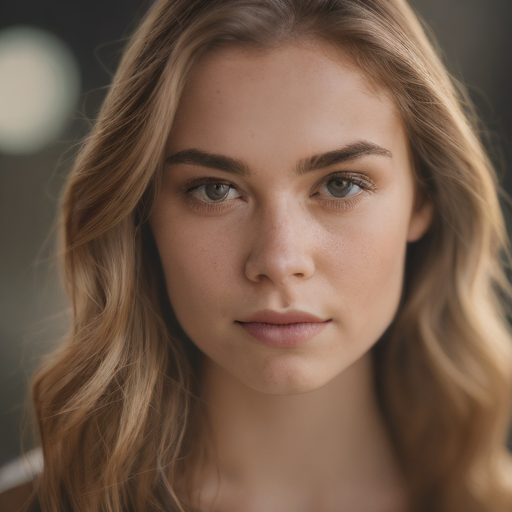

In [6]:
image = Image.open("/kaggle/input/testimages/testGenerated.png")
image

## PROMPTS

In [43]:
json_prompt = """
USER:
<image>\n
You are a JSON image describer. Given an image, return ONLY a JSON description in the following exact structure:

{
    "description": "detailed description of the image content and context",
        "attributes": {
        "age_estimation": "",
        "gender": "",
        "hair_color": "detailed description",
        "background": "",
        "eye_contact": "detailed description",
        "symmetry": ""
    },
        "real_vs_fake_indicators": {
        "skin_texture": "check for uniform or plastic-like smoothness, which may indicate AI generation. If no issues, write 'no visible issues, skin texture looks natural with visible pores' or similar.",
        "hair_strands": "inspect for irregular hair strand clumping or unnatural blending into background. If no issues, write 'no visible issues, individual strands visible'.",
        "eyes": "verify if reflections in both eyes are consistent and physically plausible. If no issues, write 'no visible issues, reflections consistent'.",
        "teeth_and_mouth": "check for irregularities in teeth alignment or inconsistent tooth texture. If no issues, write 'no visible issues, teeth aligned naturally'.",
        "ear_shape_and_position": "inspect for asymmetry or blending with hair. If no issues, write 'no visible issues, ears well defined'.",
        "hand_presence": "if hands are visible, check finger count and shape. If no hands visible, write 'no hands visible in frame'.",
        "bokeh_pattern": "check for physically plausible circular bokeh with consistent falloff. If no issues, write 'no visible issues, bokeh circles consistent'.",
        "lighting_consistency": "inspect for coherent shadow directions and soft transitions. If no issues, write 'no visible issues, lighting consistent'.",
        "artifacts": "look for double edges, smudging near high-contrast boundaries, or warping. If no issues, write 'no visible issues, no artifacts detected'.",
        "symmetry": "slight asymmetry is natural; perfect symmetry may suggest synthetic generation. If natural, write 'no visible issues, slight natural asymmetry'."
    },
}

Instructions:

Return ONLY valid JSON in a single block, without Markdown fences or any text before or after.

If any field is unknown, write "unknown".

Focus particularly on the "real_vs_fake_indicators" section, describing clearly any visible artifacts or inconsistencies that may indicate AI generation.

If no issues are detected in a field, explicitly return a short confirmation as shown above.\n


ASSISTANT:
"""


In [44]:
inputs = processor(json_prompt, image, return_tensors="pt").to("cuda", torch.float16)
input_length = inputs['input_ids'].shape[1]
output = model.generate(**inputs, max_new_tokens=1000, do_sample=True, temperature=0.3)
response = processor.decode(output[0][input_length:], skip_special_tokens=True).strip()
print(response)

{
"description": "A beautiful young lady with blonde hair, blue eyes, and a pink lipstick is posing for the camera. She is looking straight ahead, seemingly posing for a portrait. Her hair is parted to the side and her lips are slightly open, giving her a relaxed and approachable expression. The background is blurred, allowing the focus to remain on her face. The overall composition of the image is tasteful and elegant.",
"attributes": {
"age\_estimation": "20-25",
"gender": "Female",
"hair\_color": "Blonde",
"background": "Blurred",
"eye\_contact": "Direct",
"symmetry": "Good"
},
"real\_vs\_fake\_indicators": {
"skin\_texture": "No visible issues, skin texture looks natural with visible pores",
"hair\_strands": "No visible issues, individual strands visible",
"eyes": "No visible issues, reflections consistent",
"teeth\_and\_mouth": "No visible issues, teeth aligned naturally",
"ear\_shape\_and\_position": "No visible issues, ears well defined",
"hand\_presence": "No hands visible in f

In [45]:
def clean_and_validate_json(response):
    """
    Pulisce e valida il JSON generato dal modello
    """
    # Rimuovi gli underscore di escape
    cleaned = response.replace('\\_', '_')
    
    # Rimuovi eventuali markdown fences se presenti
    cleaned = re.sub(r'```json\s*|\s*```', '', cleaned)
    
    # Prova a parsare il JSON
    try:
        parsed = json.loads(cleaned)
        return parsed, True, "JSON valido"
    except json.JSONDecodeError as e:
        print(f"Errore JSON: {e}")
        
        # Tentativo di riparazione automatica
        try:
            # Aggiungi virgola mancante prima dell'ultima parentesi graffa
            if '"symmetry": "No visible issues, slight natural asymmetry"\n}' in cleaned:
                cleaned = cleaned.replace(
                    '"symmetry": "No visible issues, slight natural asymmetry"\n}',
                    '"symmetry": "No visible issues, slight natural asymmetry"\n}\n}'
                )
            
            # Riprova il parsing
            parsed = json.loads(cleaned)
            return parsed, True, "JSON riparato automaticamente"
            
        except json.JSONDecodeError:
            return cleaned, False, f"Impossibile riparare il JSON: {e}"

In [46]:
result, is_valid, message = clean_and_validate_json(response)
print(f"Status: {message}")

if is_valid:
    print("JSON valido:")
    print(json.dumps(result, indent=2))
else:
    print("JSON non valido:")
    print(result)

Status: JSON valido
JSON valido:
{
  "description": "A beautiful young lady with blonde hair, blue eyes, and a pink lipstick is posing for the camera. She is looking straight ahead, seemingly posing for a portrait. Her hair is parted to the side and her lips are slightly open, giving her a relaxed and approachable expression. The background is blurred, allowing the focus to remain on her face. The overall composition of the image is tasteful and elegant.",
  "attributes": {
    "age_estimation": "20-25",
    "gender": "Female",
    "hair_color": "Blonde",
    "background": "Blurred",
    "eye_contact": "Direct",
    "symmetry": "Good"
  },
  "real_vs_fake_indicators": {
    "skin_texture": "No visible issues, skin texture looks natural with visible pores",
    "hair_strands": "No visible issues, individual strands visible",
    "eyes": "No visible issues, reflections consistent",
    "teeth_and_mouth": "No visible issues, teeth aligned naturally",
    "ear_shape_and_position": "No visi

In [51]:
from huggingface_hub import login
login(new_session=False)

In [53]:
prompt_mistral = (
    "You are an AI authenticity validator.\n"
    "Given the following JSON describing an image:\n"
    f"{json.dumps(json_response, indent=2)}\n\n"
    "Analyze it to identify logical inconsistencies or hints indicating the image may be AI-generated.\n"
    "Return ONLY a JSON with:\n"
    "{\n"
    "  \"inconsistencies_found\": \"yes/no\",\n"
    "  \"reasoning\": \"short reasoning highlighting inconsistencies or confirming consistency\",\n"
    "  \"verdict\": \"AI\" or \"REAL\"\n"
    "}"
)

#Minstral

In [55]:
mistral_pipe = pipeline(
    "text-generation",
    model="mistralai/Mistral-7B-Instruct-v0.3",
    device_map="auto",
    torch_dtype=torch.float16
)


config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Device set to use cuda:0


In [56]:
result = mistral_pipe(prompt_mistral, max_new_tokens=300, temperature=0.2)[0]["generated_text"]
print("Mistral analysis:", result)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mistral analysis: You are an AI authenticity validator.
Given the following JSON describing an image:
"{\n\"description\": \"A young woman with blond hair and piercing green eyes. Her facial features are sharply defined, and her lips are parted slightly. Her hair is styled in loose waves, and her makeup is minimal. The image is well-lit, with the subject sitting in front of a bright background.\",\n\"attributes\": {\n\"age_estimation\": \"20s\",\n\"gender\": \"female\",\n\"hair_color\": \"blond\",\n\"background\": \"bright\",\n\"eye_contact\": \"direct\",\n\"symmetry\": \"very slight\"\n},\n\"real_vs_fake_indicators\": {\n\"skin_texture\": \"no visible issues, skin texture looks natural with visible pores\",\n\"hair_strands\": \"no visible issues, individual strands visible\",\n\"eyes\": \"no visible issues, reflections consistent\",\n\"teeth_and_mouth\": \"no visible issues, teeth aligned naturally\",\n\"ear_shape_and_position\": \"no visible issues, ears well defined\",\n\"hand_prese